In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# inp_folder="/content/drive/MyDrive/Dataset_Currency/train"
# op_folder="/content/drive/MyDrive/Dataset_Currency"
# splitfolders.ratio(inp_folder,op_folder,seed=42,ratio=(.7,.2,.1))

In [ ]:
!pip install tflearn

In [ ]:
from tensorflow import keras


from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Set the path to your training and validation data
train_data_dir = '/content/drive/MyDrive/Dataset_Currency/train'

# /content/drive/MyDrive/Dataset_Currency

validation_data_dir = '/content/drive/MyDrive/Dataset_Currency/valid'

In [ ]:
# Set the number of epochs and batch size
epochs = 3
batch_size = 32

In [ ]:
# Load the ResNet model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create a new model
model = Sequential()

In [ ]:
# Add the base model as a layer
model.add(base_model)

In [ ]:
# Add custom layers on top of the base model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 49,279,622
Trainable params: 25,691,910
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Preprocess the training and validation data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

Found 540 images belonging to 6 classes.
Found 559 images belonging to 6 classes.


In [ ]:

# Train the model
r = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=5,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

<ipython-input-17-098453d177a7>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
17/17 [==============================] - 164s 10s/step - loss: 11.1324 - accuracy: 0.8389 - val_loss: 0.6989 - val_accuracy: 0.9893
Epoch 2/5
17/17 [==============================] - 153s 9s/step - loss: 1.1996 - accuracy: 0.9852 - val_loss: 0.0090 - val_accuracy: 0.9982
Epoch 3/5
17/17 [==============================] - 153s 9s/step - loss: 1.1518 - accuracy: 0.9796 - val_loss: 1.5697e-04 - val_accuracy: 1.0000
Epoch 4/5
17/17 [==============================] - 160s 10s/step - loss: 0.3151 - accuracy: 0.9907 - val_loss: 0.1295 - val_accuracy: 0.9946
Epoch 5/5
17/17 [==============================] - 156s 9s/step - loss: 0.3470 - accuracy: 0.9944 - val_loss: 0.0413 - val_accuracy: 0.9964


In [ ]:
# Save the trained model
model.save('resnet_model_2.h5')

In [ ]:
from keras.models import load_model

# Load the saved model
model = load_model('resnet_model_2.h5')

In [ ]:
!pip install tensorflow
import tensorflow as tf


1/1 [==============================] - 1s 988ms/step


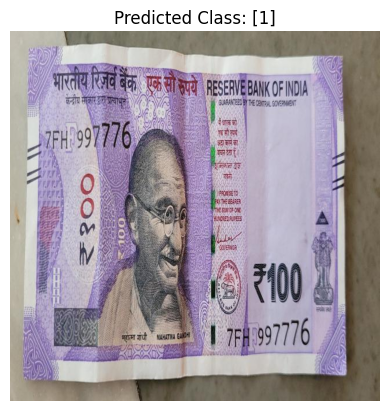

1/1 [==============================] - 0s 147ms/step


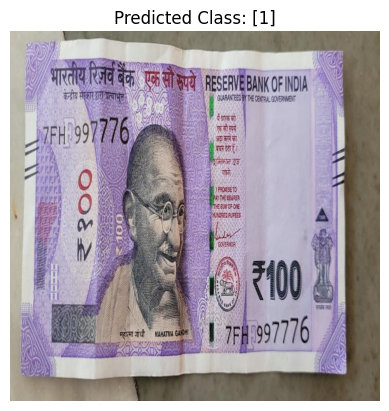

1/1 [==============================] - 0s 139ms/step


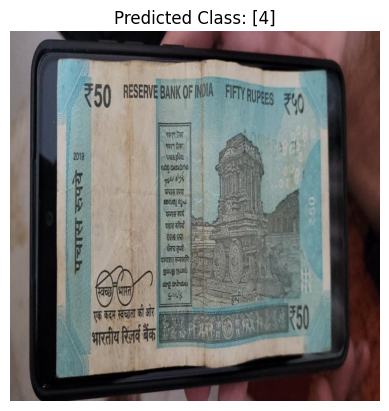

1/1 [==============================] - 0s 138ms/step


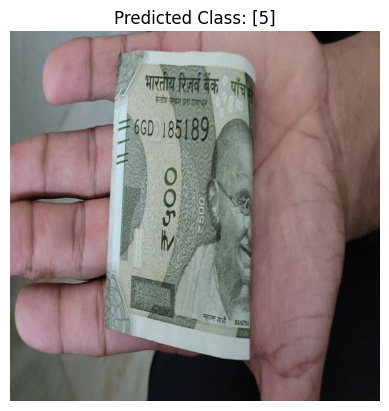

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Load your saved model
model = load_model('resnet_model_2.h5')

# Define the paths to the test images
image_paths = [
    "/content/drive/MyDrive/Dataset_Currency/test/100/20230809_123516_025_jpg.rf.1c6750cd92daa5fd104ba3b08bdc4e26.jpg",
    "/content/drive/MyDrive/Dataset_Currency/test/100/20230809_123516_043_jpg.rf.e884634401c36198606b065b60bb3213.jpg",
    "/content/drive/MyDrive/Dataset_Currency/test/50/20230727_213248_035_jpg.rf.aefd36510f9a84806628abc51e34fca0.jpg",
    "/content/drive/MyDrive/Dataset_Currency/test/500/20230727_213158_006_jpg.rf.1ecaa4d9a4fa05c3ad8714bc53a95e1e.jpg"
]

# Loop through the images for detection
for image_path in image_paths:
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))  # Replace (224, 224) with your model's input size
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)

    # Make predictions using your model
    predictions = model.predict(img)

    # You can now work directly with the predictions array, which contains your model's output
    # For example, to get the class with the highest probability:
    predicted_class = np.argmax(predictions, axis=1)

    # You can print or use the predicted_class as needed

    # Display the modified image with predictions
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Predicted Class: " + str(predicted_class))
    plt.show()

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('/content/resnet_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import cv2
image=cv2.imread(str("/content/drive/MyDrive/Dataset_Currency/test/100/20230809_123516_027_jpg.rf.78dbe574e43cd831b999d4d469e2c7ef.jpg"))
image_resize=cv2.resize(image,(224,224))
image=np.expand_dims(image_resize,axis=0)
print(image.shape)

(1, 224, 224, 3)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# image = cv2.imread("/content/runnnn.jfif")
lane_image = np.copy(image)
# gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)

cv2.imshow("result",image)

cv2.waitKey(0)

DisabledFunctionError: ignored